In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os

import analysis_utils as aute

In [2]:
# #################
# ### Constants ###
# #################

date_study_end = pd.Timestamp("23-12-2023")
path_to_cuest = "../Cuestionarios/"

In [3]:
os.listdir("../Cuestionarios")

['CHATBOTs_CUESTIONARIO_BFI.csv',
 'CHATBOTs_Demografico.csv',
 'CHATBOTs_E.csv',
 'CHATBOTs_F.csv',
 'CHATBOTs_LSAS.csv',
 'CHATBOTs_N1.csv',
 'CHATBOTs_N2.csv',
 'CHATBOTs_PERCEPCIÓN_AVATARES.csv',
 'CHATBOTs_PHQ-9.csv',
 'CHATBOTs_R.csv',
 'CHATBOTs_RELAP.csv',
 'CHATBOTs_RME-18.csv',
 'CHATBOTs_SENSORES_POST.csv',
 'CHATBOTs_SENSORES_PRE.csv',
 'CHATBOTs_STAI-Y1.csv',
 'CHATBOTs_SUS.csv',
 'CHATBOTs_T.csv',
 'CHATBOTs_TECA.csv',
 'CHATBOTs_VAS-E.csv',
 'PostProcessedCuest']

## STAI-Y1

In [4]:
df_stai_y1 = pd.read_csv("../Cuestionarios/CHATBOTs_STAI-Y1.csv")
questions_stai_y1 = dict(df_stai_y1.loc[0])
df_stai_y1 = pd.read_csv("../Cuestionarios/CHATBOTs_STAI-Y1.csv", skiprows=[1])
print("Shape", df_stai_y1.shape)
print("Columns", df_stai_y1.columns)

Shape (62, 30)
Columns Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario',
       'A continuación, encontrará unas frases que se utilizan corrientemente para describirse uno a sí mismo. Lea cada frase y señale la puntuación de "nada" a "mucho" que indique mejor cómo se siente usted ahora mismo, en este momento. No hay respuestas buenas ni malas. No emplee demasiado tiempo en cada frase y conteste señalando la respuesta que mejor describa su situación actual.',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'],
      dtype='object')


In [5]:
from_cat_to_num_dict = {"Nada": 1, "Algo": 2, "Bastante": 3, "Mucho": 4}

In [6]:
df_stai_y1["Unnamed: 11"]

0     3.0
1     2.0
2     2.0
3     2.0
4     2.0
     ... 
57    2.0
58    2.0
59    2.0
60    1.0
61    NaN
Name: Unnamed: 11, Length: 62, dtype: float64

In [7]:
cols_see = [
    'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
    'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
    'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
    'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
    'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'
]

for col in cols_see:
    print(df_stai_y1[col].nunique())

4
3
3
4
4
4
4
4
4
4
3
4
4
4
4
4
3
4
4


### BFI

In [8]:
df_bfi = pd.read_csv("../Cuestionarios/CHATBOTs_CUESTIONARIO_BFI.csv")
df_bfi.columns

Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario',
       'Valore de 1 a 5 cada afirmación del cuestionario siguiendo el siguiente criterio:',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53'],
      dtype='obje

### Demographic

In [9]:
df_demo = pd.read_csv("../Cuestionarios/CHATBOTs_Demografico.csv", skiprows=[1])
print("Shape", df_demo.shape)
print(df_demo.columns)

Shape (67, 39)
Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario', 'Marque con una su género:',
       'Escriba su fecha de nacimiento', 'Escriba su nacionalidad',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Marque con una cruz la situación en la que se encuentra',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Marque su nivel de estudios', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Marque de forma aproximada su nivel de ingresos anuales',
       'Señala su horientación sexual',
       'Sueles jugar a videojuegos de aventura, acción, estrategia, simulación, MMORPG?',
       'Unnamed: 35', '¿Has estado alguna vez en terapia psicológica?',
       '¿Tomas alguna medicación psicofarmacológica?', 'Unnamed: 

In [10]:
df_demo

,respondent_id,collector_id,date_created,date_modified,ip_address,email_address,first_name,last_name,custom_1,Usuario,...,Unnamed: 29,Unnamed: 30,Unnamed: 31,Marque de forma aproximada su nivel de ingresos anuales,Señala su horientación sexual,"Sueles jugar a videojuegos de aventura, acción, estrategia, simulación, MMORPG?",Unnamed: 35,¿Has estado alguna vez en terapia psicológica?,¿Tomas alguna medicación psicofarmacológica?,Unnamed: 38
0,118232635701,448136109,01/31/2023 12:54:30 PM,01/31/2023 01:00:26 PM,158.42.142.216,NaN,NaN,NaN,NaN,USER_03_CB2,...,4.0,NaN,NaN,1.0,1.0,0.0,2,1.0,1.0,NaN
1,118232568969,448136109,01/31/2023 11:00:23 AM,01/31/2023 11:09:53 AM,158.42.142.216,NaN,NaN,NaN,NaN,USER_02_CB2,...,NaN,5.0,NaN,1.0,1.0,0.0,1.5,1.0,1.0,NaN
2,118232494605,448136109,01/31/2023 08:53:43 AM,01/31/2023 09:07:53 AM,158.42.142.216,NaN,NaN,NaN,NaN,USER_01_CB2,...,4.0,NaN,NaN,1.0,1.0,2.0,NaN,1.0,1.0,NaN
3,118231629780,448136109,01/30/2023 12:29:10 PM,01/30/2023 12:35:40 PM,158.42.69.27,NaN,NaN,NaN,NaN,USER_PILOTO01_CB2,...,NaN,5.0,NaN,6.0,1.0,2.0,NaN,2.0,1.0,NaN
4,118231629823,448136109,01/30/2023 12:29:22 PM,01/30/2023 12:31:37 PM,158.42.69.27,NaN,NaN,NaN,NaN,USER_PILOTO01_CB2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,118163072253,448136109,10/31/2022 10:18:49 AM,10/31/2022 10:19:12 AM,31.221.139.42,NaN,NaN,NaN,NaN,AET_PRUEBA6,...,NaN,NaN,NaN,1.0,2.0,2.0,NaN,2.0,3.0,NaN
63,118163071767,448136109,10/31/2022 10:17:50 AM,10/31/2022 10:17:57 AM,31.221.139.42,NaN,NaN,NaN,NaN,AET_PRUEBA5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,118163071339,448136109,10/31/2022 10:17:06 AM,10/31/2022 10:17:11 AM,31.221.139.42,NaN,NaN,NaN,NaN,AET_PRUEBA4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,118163070503,448136109,10/31/2022 10:15:23 AM,10/31/2022 10:15:29 AM,31.221.139.42,NaN,NaN,NaN,NaN,AET_PRUEBA2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
age_list = []
for date in df_demo["Escriba su fecha de nacimiento"].values:
    if date == "19":
        age_list.append(int(date))
    elif isinstance(date, str):
        subj_age = np.abs(date_study_end - pd.Timestamp(date))
        age_list.append(np.round(subj_age.days/365, 2))
    elif np.isnan(date):
        age_list.append(np.nan)
    else:
        age_list.append(np.nan)
        print("Other format", date)
        
print(age_list)

df_demo["AgeYears"] = age_list

[22.3, 19.29, 21.88, 26.49, nan, 38.56, 27.01, 24.04, 50.88, 26.99, 43.3, 44.01, 34.36, 46.27, 28.63, 20.47, 47.53, 36.83, 42.22, 36.5, 46.46, 44.21, 37.05, 29.44, 25.46, 25.12, 44.93, 23.24, 20.92, 30.53, 44.24, 21.42, 20.42, 19, 20.53, 35.28, 23.36, 36.92, 20.45, 21.1, 43.41, 21.54, 28.38, 27.95, 31.72, 23.75, 51.36, 22.74, 23.08, 25.3, 47.12, 46.65, 32.51, 23.73, 21.01, 43.17, 23.65, 26.85, 28.12, 30.76, nan, 23.12, 24.78, nan, nan, nan, 24.99]


In [12]:
df_demo["Escriba su fecha de nacimiento"].unique()

array(['09/10/2001', '09/11/2004', '2/10/2002', '07/03/1997', nan,
       '06/09/1985', '25/12/1996', '16/12/1999', '18/2/1973', '1997',
       '13/09/1980', '29/12/1979', '21/08/1989', '27/09/77', '15/05/1995',
       '07/08/2003', '23/06/71', '03/04/1987', '14/10/1981', '07/04/1987',
       '19-07-1977', '18/10/1979', '14-12-1986', '21/07/1994',
       '13/07/1998', '17-11-1998', '27/01/1979', '30/09/2000',
       '28/01/2003', '21/06/1993', '03-08-68', '28/07/2002', '28/07/2003',
       '19', '19 06 2003', '19/09/88', '18/08/2000', '30-01-1987',
       '15/07/2003', '22/11/02', '08/05/1980', '15/06/2002', '08/12/1995',
       '17/1/1996', '04/10/1992', '30/03/2000', '24/08/1972', '4-3-2001',
       '28/11/2000', '09/09/1998', '20/11/1976', '05/09/1977',
       '29/06/1991', '04/07/2000', '25/12/2002', '31/10/1980',
       '05/04/2000', '23/02/1997', '15/11/1995', '26/03/1993',
       '13/11/2000', '18/3/1999', '1999'], dtype=object)

In [13]:
gender_f_name = "Marque con una su género:"
df_demo["GenderFem"] = (df_demo[gender_f_name] == "Femenino")*1
df_demo["GenderOther"] = ((df_demo[gender_f_name] != "Femenino") * (df_demo[gender_f_name] != "Masculino"))*1
df_demo[["GenderFem", "GenderOther"]].head(8)

,GenderFem,GenderOther
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1


In [15]:
v_f_name = "Sueles jugar a videojuegos de aventura, acción, estrategia, simulación, MMORPG?"
v_num_f_name = "Unnamed: 35"

df_demo[v_num_f_name] = df_demo[v_num_f_name].replace({"1.5h": 1.5, "1 hora": 1})

print(df_demo[v_f_name].unique())

num_h_play_list = []
for v in df_demo[v_num_f_name].values:
    if isinstance(v, str):
        num_h_play_list.append(float(v.split()[0]))
    else:
        num_h_play_list.append(v)

df_demo["NumHPlayVGame"] = num_h_play_list

df_demo["PlayVGame"] = (df_demo[v_f_name] == "Sí, estimas de numero de horas que le dedicas cada día:")*1

df_demo[[v_f_name, "PlayVGame", v_num_f_name, "NumHPlayVGame"]].head(8)

[ 0.  2. nan]


,"Sueles jugar a videojuegos de aventura, acción, estrategia, simulación, MMORPG?",PlayVGame,Unnamed: 35,NumHPlayVGame
0,0.0,0,2,2.0
1,0.0,0,1.5,1.5
2,2.0,0,NaN,NaN
3,2.0,0,NaN,NaN
4,NaN,0,NaN,NaN
5,2.0,0,NaN,NaN
6,2.0,0,NaN,NaN
7,0.0,0,1.5,1.5


In [16]:
ps_f_name = "¿Has estado alguna vez en terapia psicológica?"
print(df_demo[ps_f_name].unique())

df_demo["OrdinalPs"] = [0] * df_demo.shape[0]

df_demo.loc[df_demo[ps_f_name]=="Sí, en el último año", "OrdinalPs"] = 1
df_demo.loc[df_demo[ps_f_name]=="Sí, hace más de 1 año", "OrdinalPs"] = 2
df_demo.loc[df_demo[ps_f_name]=="Sí, hace más de 5 años", "OrdinalPs"] = 3
df_demo.loc[pd.isna(df_demo[ps_f_name]), "OrdinalPs"] = -1

df_demo[[ps_f_name, "OrdinalPs"]].head(8)

[ 1.  2. nan  4.  5.  3.]


,¿Has estado alguna vez en terapia psicológica?,OrdinalPs
0,1.0,0
1,1.0,0
2,1.0,0
3,2.0,0
4,NaN,-1
5,1.0,0
6,2.0,0
7,4.0,0


In [17]:
m_f_name = "¿Tomas alguna medicación psicofarmacológica?"
print(df_demo[m_f_name].unique())

df_demo["NoMedicine"] = ( (df_demo[m_f_name] == "No") | (pd.isna(df_demo[m_f_name])) ) * 1

df_demo[[m_f_name, "NoMedicine"]].head(8)

[ 1. nan  2.  3.]


,¿Tomas alguna medicación psicofarmacológica?,NoMedicine
0,1.0,0
1,1.0,0
2,1.0,0
3,1.0,0
4,NaN,1
5,1.0,0
6,1.0,0
7,1.0,0


In [18]:
df_demo.to_csv(path_to_cuest + "PostProcessedCuest/DemographicPostProc.csv", sep=";")

## LSAS

In [19]:
df_lsas = pd.read_csv("../Cuestionarios/CHATBOTs_LSAS.csv", skiprows=[1])
print(df_lsas.columns)
print("Shape", df_lsas.shape)
display(df_lsas.head(8))

Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario',
       'Por favor, lea con atención cada grupo de afirmaciones y luego elija un afirmación de cada grupo, que mejor le representa COMO SE HA SENTIDO EN LAS ÚLTIMAS DOS SEMANAS.',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Por favor, lea con atención cada grupo de afirmaciones y luego elija un afirmación de cada grupo, que mejor le representa COMO SE HA SENTIDO EN LAS ÚLTIMAS DOS SEMANAS..1',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 3

,respondent_id,collector_id,date_created,date_modified,ip_address,email_address,first_name,last_name,custom_1,Usuario,...,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57
0,118232640788,448135553,01/31/2023 12:54:52 PM,01/31/2023 01:08:27 PM,158.42.142.216,NaN,NaN,NaN,NaN,USER_03_CB2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,118232573354,448135553,01/31/2023 11:15:22 AM,01/31/2023 11:19:03 AM,158.42.142.216,NaN,NaN,NaN,NaN,USER_02_CB2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,118232506947,448135553,01/31/2023 08:54:36 AM,01/31/2023 09:19:43 AM,158.42.142.216,NaN,NaN,NaN,NaN,USER_01_CB2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,118231629929,448135553,01/30/2023 12:30:11 PM,01/30/2023 12:46:22 PM,158.42.69.27,NaN,NaN,NaN,NaN,USER_PILOTO01_CB2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,118205855136,448135553,12/21/2022 08:44:37 AM,12/21/2022 09:22:13 AM,158.42.69.160,NaN,NaN,NaN,NaN,User_52_CB,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,118204969090,448135553,12/20/2022 08:47:11 AM,12/20/2022 09:03:19 AM,158.42.69.160,NaN,NaN,NaN,NaN,User_51_CB,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,118204203539,448135553,12/19/2022 10:41:59 AM,12/19/2022 01:18:42 PM,158.42.69.160,NaN,NaN,NaN,NaN,User_50_CB,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,118204088046,448135553,12/19/2022 08:36:16 AM,12/19/2022 09:05:52 AM,158.42.69.160,NaN,NaN,NaN,NaN,User_49_CB,...,3.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0


## N1 and N2

In [20]:
df_n1 = pd.read_csv("../Cuestionarios/CHATBOTs_N1.csv", skiprows=[1])
print(df_n1.columns)
print("Shape", df_n1.shape)
display(df_n1.head(8))

Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario',
       'Tienes que elegir un numero entre 1 y 7, siendo 1 “me he notado muy forzado durante la conversación” y 7 “me he notado muy natural durante la conversación”.',
       'Tienes que elegir un numero entre 1 y 7, siendo 1 “ha sido una conversación artificial. No se parece nada a una conversación real” y 7 “ha sido una conversación realista. El contenido ha sido muy parecido a lo de una conversación real”.',
       'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica tu nivel de valencia de la conversación.',
       'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica tu nivel de arousal.',
       'El nivel en que has sentido que dominabas (controlabas a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica t

,respondent_id,collector_id,date_created,date_modified,ip_address,email_address,first_name,last_name,custom_1,Usuario,...,Relajado,Sorpresa,Tristeza,Disgusto.1,Felicidad.1,Enfado.1,Miedo.1,Relajado.1,Sorpresa.1,Tristeza.1
0,114233268923,423466282,01/31/2023 01:59:23 PM,01/31/2023 02:03:44 PM,158.42.142.216,NaN,NaN,NaN,NaN,User_03_CB2(OK),...,68.0,22.0,1.0,0.0,48.0,0.0,0.0,66.0,23.0,0.0
1,114233261077,423466282,01/31/2023 01:35:13 PM,01/31/2023 01:51:14 PM,158.42.142.216,NaN,NaN,NaN,NaN,User_03_CB2,...,69.0,13.0,0.0,0.0,50.0,0.0,0.0,64.0,0.0,0.0
2,114233202790,423466282,01/31/2023 12:01:39 PM,01/31/2023 12:08:08 PM,158.42.142.216,NaN,NaN,NaN,NaN,USER_02_CB2,...,93.0,99.0,0.0,1.0,70.0,2.0,13.0,89.0,73.0,11.0
3,114233146952,423466282,01/31/2023 10:01:10 AM,01/31/2023 10:11:23 AM,158.42.142.216,NaN,NaN,NaN,NaN,USER_01_CB2,...,43.0,18.0,0.0,0.0,31.0,0.0,0.0,36.0,17.0,0.0
4,114232337074,423466282,01/30/2023 02:30:37 PM,01/30/2023 02:38:11 PM,158.42.69.27,NaN,NaN,NaN,NaN,USER_PILOTO01_CB2,...,63.0,4.0,6.0,4.0,28.0,5.0,6.0,50.0,28.0,7.0
5,114208052527,423466282,12/21/2022 10:19:54 AM,12/21/2022 10:24:24 AM,158.42.69.160,NaN,NaN,NaN,NaN,User_52_CB,...,68.0,61.0,4.0,10.0,50.0,3.0,5.0,53.0,5.0,6.0
6,114207202386,423466282,12/20/2022 09:52:09 AM,12/20/2022 10:02:55 AM,158.42.69.160,NaN,NaN,NaN,NaN,User_51_CB,...,82.0,50.0,4.0,50.0,50.0,15.0,18.0,36.0,50.0,5.0
7,114206492560,423466282,12/19/2022 02:16:17 PM,12/19/2022 02:24:37 PM,158.42.69.160,NaN,NaN,NaN,NaN,User_50_CB,...,35.0,8.0,0.0,0.0,0.0,0.0,0.0,13.0,1.0,0.0


In [21]:
old_columns_name = [
    'Tienes que elegir un numero entre 1 y 7, siendo 1 “me he notado muy forzado durante la conversación” y 7 “me he notado muy natural durante la conversación”.',
    'Tienes que elegir un numero entre 1 y 7, siendo 1 “ha sido una conversación artificial. No se parece nada a una conversación real” y 7 “ha sido una conversación realista. El contenido ha sido muy parecido a lo de una conversación real”.',
    'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica tu nivel de valencia de la conversación.',
    'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica tu nivel de arousal.',
    'El nivel en que has sentido que dominabas (controlabas a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica tu nivel de dominancia emocional.',
    'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica el nivel de valencia DEL AVATAR durante la conversación',
    'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica el nivel de arousal DEL AVATAR durante la conversación.',
    'El nivel en que ha sentido que EL AVATAR estaba dominado (controlando a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica el nivel de dominancia emocional DEL AVATAR.'
]

new_columns_name = [
    "Question1", "Question2", "Question3", "Question4", "Question5", "Question6", "Question7", "Question8"
]

change_name_column_dict = dict(zip(old_columns_name, new_columns_name))

In [22]:
for old_c, new_c in change_name_column_dict.items():
    new_col_list = [int(v.split(".")[0]) if isinstance(v, str) else int(v) for v in df_n1[old_c].values]
    df_n1[new_c] = new_col_list
    
display(df_n1[new_columns_name].head(8))

,Question1,Question2,Question3,Question4,Question5,Question6,Question7,Question8
0,4,3,4,4,7,5,3,3
1,3,3,5,3,1,5,5,7
2,7,7,9,5,7,8,5,6
3,4,4,7,4,7,7,4,7
4,1,4,3,5,7,3,2,1
5,4,5,3,5,2,7,5,5
6,7,4,6,4,5,5,6,8
7,5,4,5,3,3,5,5,2


## Percepción avatares

In [23]:
df_pa = pd.read_csv("../Cuestionarios/CHATBOTs_PERCEPCIÓN_AVATARES.csv", skiprows=[1])
print(df_pa.columns)
print("Shape", df_pa.shape)
display(df_pa.head(8))

Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario',
       'Pensando en los avatares con los que acabas de hablar, evalúa el contenido de las siguientes frases:',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'],
      dtype='object')
Shape (59, 30)


,respondent_id,collector_id,date_created,date_modified,ip_address,email_address,first_name,last_name,custom_1,Usuario,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,118232711699,448444258,01/31/2023 02:34:13 PM,01/31/2023 02:36:36 PM,158.42.142.216,NaN,NaN,NaN,NaN,User_03_CB2,...,1.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,2.0,1.0
1,118232622847,448444258,01/31/2023 12:40:03 PM,01/31/2023 12:42:46 PM,158.42.142.216,NaN,NaN,NaN,NaN,USER_02_CB2,...,2.0,2.0,1.0,3.0,2.0,4.0,3.0,3.0,3.0,4.0
2,118232560265,448444258,01/31/2023 10:52:17 AM,01/31/2023 10:55:39 AM,158.42.142.216,NaN,NaN,NaN,NaN,USER_01_CB2,...,2.0,2.0,3.0,3.0,2.0,3.0,2.0,3.0,4.0,3.0
3,118231753653,448444258,01/30/2023 03:24:57 PM,01/30/2023 03:31:02 PM,158.42.69.27,NaN,NaN,NaN,NaN,USER_PILOTO01_CB2,...,2.0,3.0,2.0,0.0,0.0,NaN,2.0,3.0,3.0,3.0
4,118205894603,448444258,12/21/2022 10:46:29 AM,12/21/2022 10:48:49 AM,158.42.69.160,NaN,NaN,NaN,NaN,User_52_CB,...,3.0,2.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0
5,118205018905,448444258,12/20/2022 10:42:39 AM,12/20/2022 10:51:52 AM,158.42.69.160,NaN,NaN,NaN,NaN,User_51_CB,...,2.0,4.0,3.0,2.0,1.0,1.0,1.0,2.0,3.0,3.0
6,118204290691,448444258,12/19/2022 02:56:36 PM,12/19/2022 03:04:06 PM,158.42.69.160,NaN,NaN,NaN,NaN,User_50_CB,...,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,1.0
7,118204129668,448444258,12/19/2022 10:37:20 AM,12/19/2022 10:41:30 AM,158.42.69.160,NaN,NaN,NaN,NaN,User_49_CB,...,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0


## Avatars

### Happy

In [24]:
df_happy = pd.read_csv("../Cuestionarios/CHATBOTs_F.csv", skiprows=[1])
print(df_happy.shape)
print(df_happy.columns)

(58, 32)
Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario',
       'Tienes que elegir un numero entre 1 y 7, siendo 1 “me he notado muy forzado durante la conversación” y 7 “me he notado muy natural durante la conversación”.',
       'Tienes que elegir un numero entre 1 y 7, siendo 1 “ha sido una conversación artificial. No se parece nada a una conversación real” y 7 “ha sido una conversación realista. El contenido ha sido muy parecido a lo de una conversación real”.',
       'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica tu nivel de valencia de la conversación.',
       'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica tu nivel de arousal.',
       'El nivel en que has sentido que dominabas (controlabas a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante".

In [25]:
# ###########################
# ### Change column names ###
# ###########################

old_columns_name = [
    'Tienes que elegir un numero entre 1 y 7, siendo 1 “me he notado muy forzado durante la conversación” y 7 “me he notado muy natural durante la conversación”.',
    'Tienes que elegir un numero entre 1 y 7, siendo 1 “ha sido una conversación artificial. No se parece nada a una conversación real” y 7 “ha sido una conversación realista. El contenido ha sido muy parecido a lo de una conversación real”.',
    'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica tu nivel de valencia de la conversación.',
    'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica tu nivel de arousal.',
    'El nivel en que has sentido que dominabas (controlabas a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica tu nivel de dominancia emocional.',
    'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica el nivel de valencia DEL AVATAR durante la conversación',
    'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica el nivel de arousal DEL AVATAR durante la conversación.',
    'El nivel en que ha sentido que EL AVATAR estaba dominado (controlando a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica el nivel de dominancia emocional DEL AVATAR.'
]

new_columns_name = [
    "Question1", "Question2", "Question3", "Question4", "Question5", "Question6", "Question7", "Question8"
]

change_name_column_dict = dict(zip(old_columns_name, new_columns_name))

df_happy = df_happy.rename(columns=change_name_column_dict)

# #########################
# ### Change categories ###
# #########################

from_one_to_seven = {
    '1. Muy forzado': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7. Muy natural': 7
}
from_one_to_seven_2 = {
    '1. Muy artificial': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7. Muy realista': 7
}
from_one_to_nine = {
    '1. Muy negativa': 1, '2': 2, '3': 3, '4': 4, '5. Neutral': 5, '6': 6, '7': 7, '8': 8, '9. Muy positiva': 9
}
from_one_to_nine_arousal = {
    '1. Ninguno': 1, '2': 2, '3': 3, '4': 4, '5. Normal': 5, '6': 6, '7': 7, '8': 8, '9. Mucho': 9
}
from_one_to_nine_dom = {
    '1. No dominante': 1, '2': 2, '3': 3, '4': 4, '5. Normal': 5, '6': 6, '7': 7, '8': 8, '9. Muy dominante': 9
}
from_one_to_nine_pos = {
    '1. Muy negativa': 1, '2': 2, '3': 3, '4': 4, '5. Neutral': 5, '6': 6, '7': 7, '8': 8, '9. Muy positiva': 9
}
from_one_to_nine_calm = {
    '1. Calma': 1, '2': 2, '3': 3, '4': 4, '5. Normal': 5, '6': 6, '7': 7, '8': 8, '9. Excitación': 9
}
categories_dict_list = [
    from_one_to_seven,
    from_one_to_seven_2,
    from_one_to_nine,
    from_one_to_nine_arousal,
    from_one_to_nine_dom,
    from_one_to_nine_pos,
    from_one_to_nine_calm,
    from_one_to_nine_dom
]

change_value_per_column_dict = dict(zip(new_columns_name, categories_dict_list))

df_happy = df_happy.replace(change_value_per_column_dict)

### All avatars

In [26]:
personality_cuest_list = ["CHATBOTs_F", "CHATBOTs_T", "CHATBOTs_E", "CHATBOTs_R", "CHATBOTs_N1", "CHATBOTs_N2"]
personality_cuest_to_save_list = [
    "CuestAvatarHappy", "CuestAvatarSad", "CuestAvatarAngry", "CuestAvatarRelax", "CuestAvatarN1", "CuestAvatarN2"
]

for i_pers, pers in enumerate(personality_cuest_list):
    data = pd.read_csv(path_to_cuest + pers + ".csv", skiprows=[1])
    
    # ###########################
    # ### Change column names ###
    # ###########################

    old_columns_name = [
        'Tienes que elegir un numero entre 1 y 7, siendo 1 “me he notado muy forzado durante la conversación” y 7 “me he notado muy natural durante la conversación”.',
        'Tienes que elegir un numero entre 1 y 7, siendo 1 “ha sido una conversación artificial. No se parece nada a una conversación real” y 7 “ha sido una conversación realista. El contenido ha sido muy parecido a lo de una conversación real”.',
        'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica tu nivel de valencia de la conversación.',
        'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica tu nivel de arousal.',
        'El nivel en que has sentido que dominabas (controlabas a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica tu nivel de dominancia emocional.',
        'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica el nivel de valencia DEL AVATAR durante la conversación',
        'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica el nivel de arousal DEL AVATAR durante la conversación.',
        'El nivel en que ha sentido que EL AVATAR estaba dominado (controlando a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica el nivel de dominancia emocional DEL AVATAR.'
    ]

    new_columns_name = [
        "Question1", "Question2", "Question3", "Question4", "Question5", "Question6", "Question7", "Question8"
    ]

    change_name_column_dict = dict(zip(old_columns_name, new_columns_name))

    data = data.rename(columns=change_name_column_dict)

    # #########################
    # ### Change categories ###
    # #########################

    from_one_to_seven = {
        '1. Muy forzado': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7. Muy natural': 7
    }
    from_one_to_seven_2 = {
        '1. Muy artificial': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7. Muy realista': 7
    }
    from_one_to_nine = {
        '1. Muy negativa': 1, '2': 2, '3': 3, '4': 4, '5. Neutral': 5, '6': 6, '7': 7, '8': 8, '9. Muy positiva': 9
    }
    from_one_to_nine_arousal = {
        '1. Ninguno': 1, '2': 2, '3': 3, '4': 4, '5. Normal': 5, '6': 6, '7': 7, '8': 8, '9. Mucho': 9
    }
    from_one_to_nine_dom = {
        '1. No dominante': 1, '2': 2, '3': 3, '4': 4, '5. Normal': 5, '6': 6, '7': 7, '8': 8, '9. Muy dominante': 9
    }
    from_one_to_nine_pos = {
        '1. Muy negativa': 1, '2': 2, '3': 3, '4': 4, '5. Neutral': 5, '6': 6, '7': 7, '8': 8, '9. Muy positiva': 9
    }
    from_one_to_nine_calm = {
        '1. Calma': 1, '2': 2, '3': 3, '4': 4, '5. Normal': 5, '6': 6, '7': 7, '8': 8, '9. Excitación': 9
    }
    categories_dict_list = [
        from_one_to_seven,
        from_one_to_seven_2,
        from_one_to_nine,
        from_one_to_nine_arousal,
        from_one_to_nine_dom,
        from_one_to_nine_pos,
        from_one_to_nine_calm,
        from_one_to_nine_dom
    ]

    change_value_per_column_dict = dict(zip(new_columns_name, categories_dict_list))

    data = data.replace(change_value_per_column_dict)
    
    for col in new_columns_name:
        if data[col].dtype == "O":
            # The possible strings that are in a column are removed checking if they are strings or not.
            data[col] = [
                int(v.split(".")[0]) if isinstance(v, str) else int(v) for v in data[col]
            ]
    
    data.to_csv(path_to_cuest + "PostProcessedCuest/" + personality_cuest_to_save_list[i_pers] + ".csv", sep=",")
    

## PHQ-9

In [27]:
df_phq9 = pd.read_csv("../Cuestionarios/CHATBOTs_PHQ-9.csv", skiprows=[1])

In [28]:
cols_to_sum = [
    'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
    'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
    'Unnamed: 19'
]

In [29]:
df_phq9["TotalSum"] = np.nansum(df_phq9[cols_to_sum], axis=1)

In [30]:
phq9_th_depress = 5

In [31]:
all_users_no_depress = df_phq9[df_phq9["TotalSum"] < phq9_th_depress]["Usuario"].values
subj_no_depress_list = [
    subj for subj in all_users_no_depress if isinstance(subj, str) and "CB" in subj and not "P" in subj
]
print("Num of subjects", len(subj_no_depress_list))
subj_no_depress_list

Num of subjects 34


['USER_03_CB2',
 'USER_02_CB2',
 'USER_01_CB2',
 'User_52_CB',
 'User_51_CB',
 'User_50_CB',
 'User_49_CB',
 'User_46_CB',
 'User_45_CB',
 'User_44_CB',
 'User_43_CB',
 'User_41_CB',
 'User_40_CB',
 'User_39_CB',
 'User_37_CB',
 'User_36_CB',
 'User_35_CB',
 'User_33_CB',
 'User_29_CB',
 'User_28_CB',
 'User_27_CB',
 'User_25_CB',
 'User_24_CB',
 'User_23_CB',
 'User_22_CB',
 'User_20_CB',
 'User_18_CB',
 'User_17_CB',
 'User_13_CB',
 'User_10_CB',
 'User_07_CB',
 'User_03_CB',
 'User_02_CB',
 'User_01_CB']

# Cuest Analysis

In [32]:
df_angry = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarAngry.csv")
idx_clean = [i_us for i_us, us in enumerate(df_angry["Usuario"]) if "User" in us and us in subj_no_depress_list]
df_angry = df_angry.loc[idx_clean]
df_angry["Personality"] = "Angry"

df_happy = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarHappy.csv")
idx_clean = [i_us for i_us, us in enumerate(df_happy["Usuario"]) if "User" in us and us in subj_no_depress_list]
df_happy = df_happy.loc[idx_clean]
df_happy["Personality"] = "Happy"

df_relax = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarRelax.csv")
idx_clean = [i_us for i_us, us in enumerate(df_relax["Usuario"]) if "User" in us and us in subj_no_depress_list]
df_relax = df_relax.loc[idx_clean]
df_relax["Personality"] = "Relax"

df_sad = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarSad.csv")
idx_clean = [i_us for i_us, us in enumerate(df_sad["Usuario"]) if "User" in us and us in subj_no_depress_list]
df_sad = df_sad.loc[idx_clean]
df_sad["Personality"] = "Sad"

df_neutral1 = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarN1.csv")
idx_clean = [i_us for i_us, us in enumerate(df_sad["Usuario"]) if "User" in us and us in subj_no_depress_list]
df_neutral1 = df_neutral1.loc[idx_clean]
df_neutral1["Personality"] = "Neutral1"

df_neutral2 = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarN2.csv")
idx_clean = [i_us for i_us, us in enumerate(df_sad["Usuario"]) if "User" in us and us in subj_no_depress_list]
df_neutral2 = df_neutral2.loc[idx_clean]
df_neutral2["Personality"] = "Neutral2"

df_all_cuest = pd.concat([df_angry, df_happy, df_relax, df_sad, df_neutral1, df_neutral2]).reset_index(drop=True)

### Natural and realism

P-value nan with significance ***


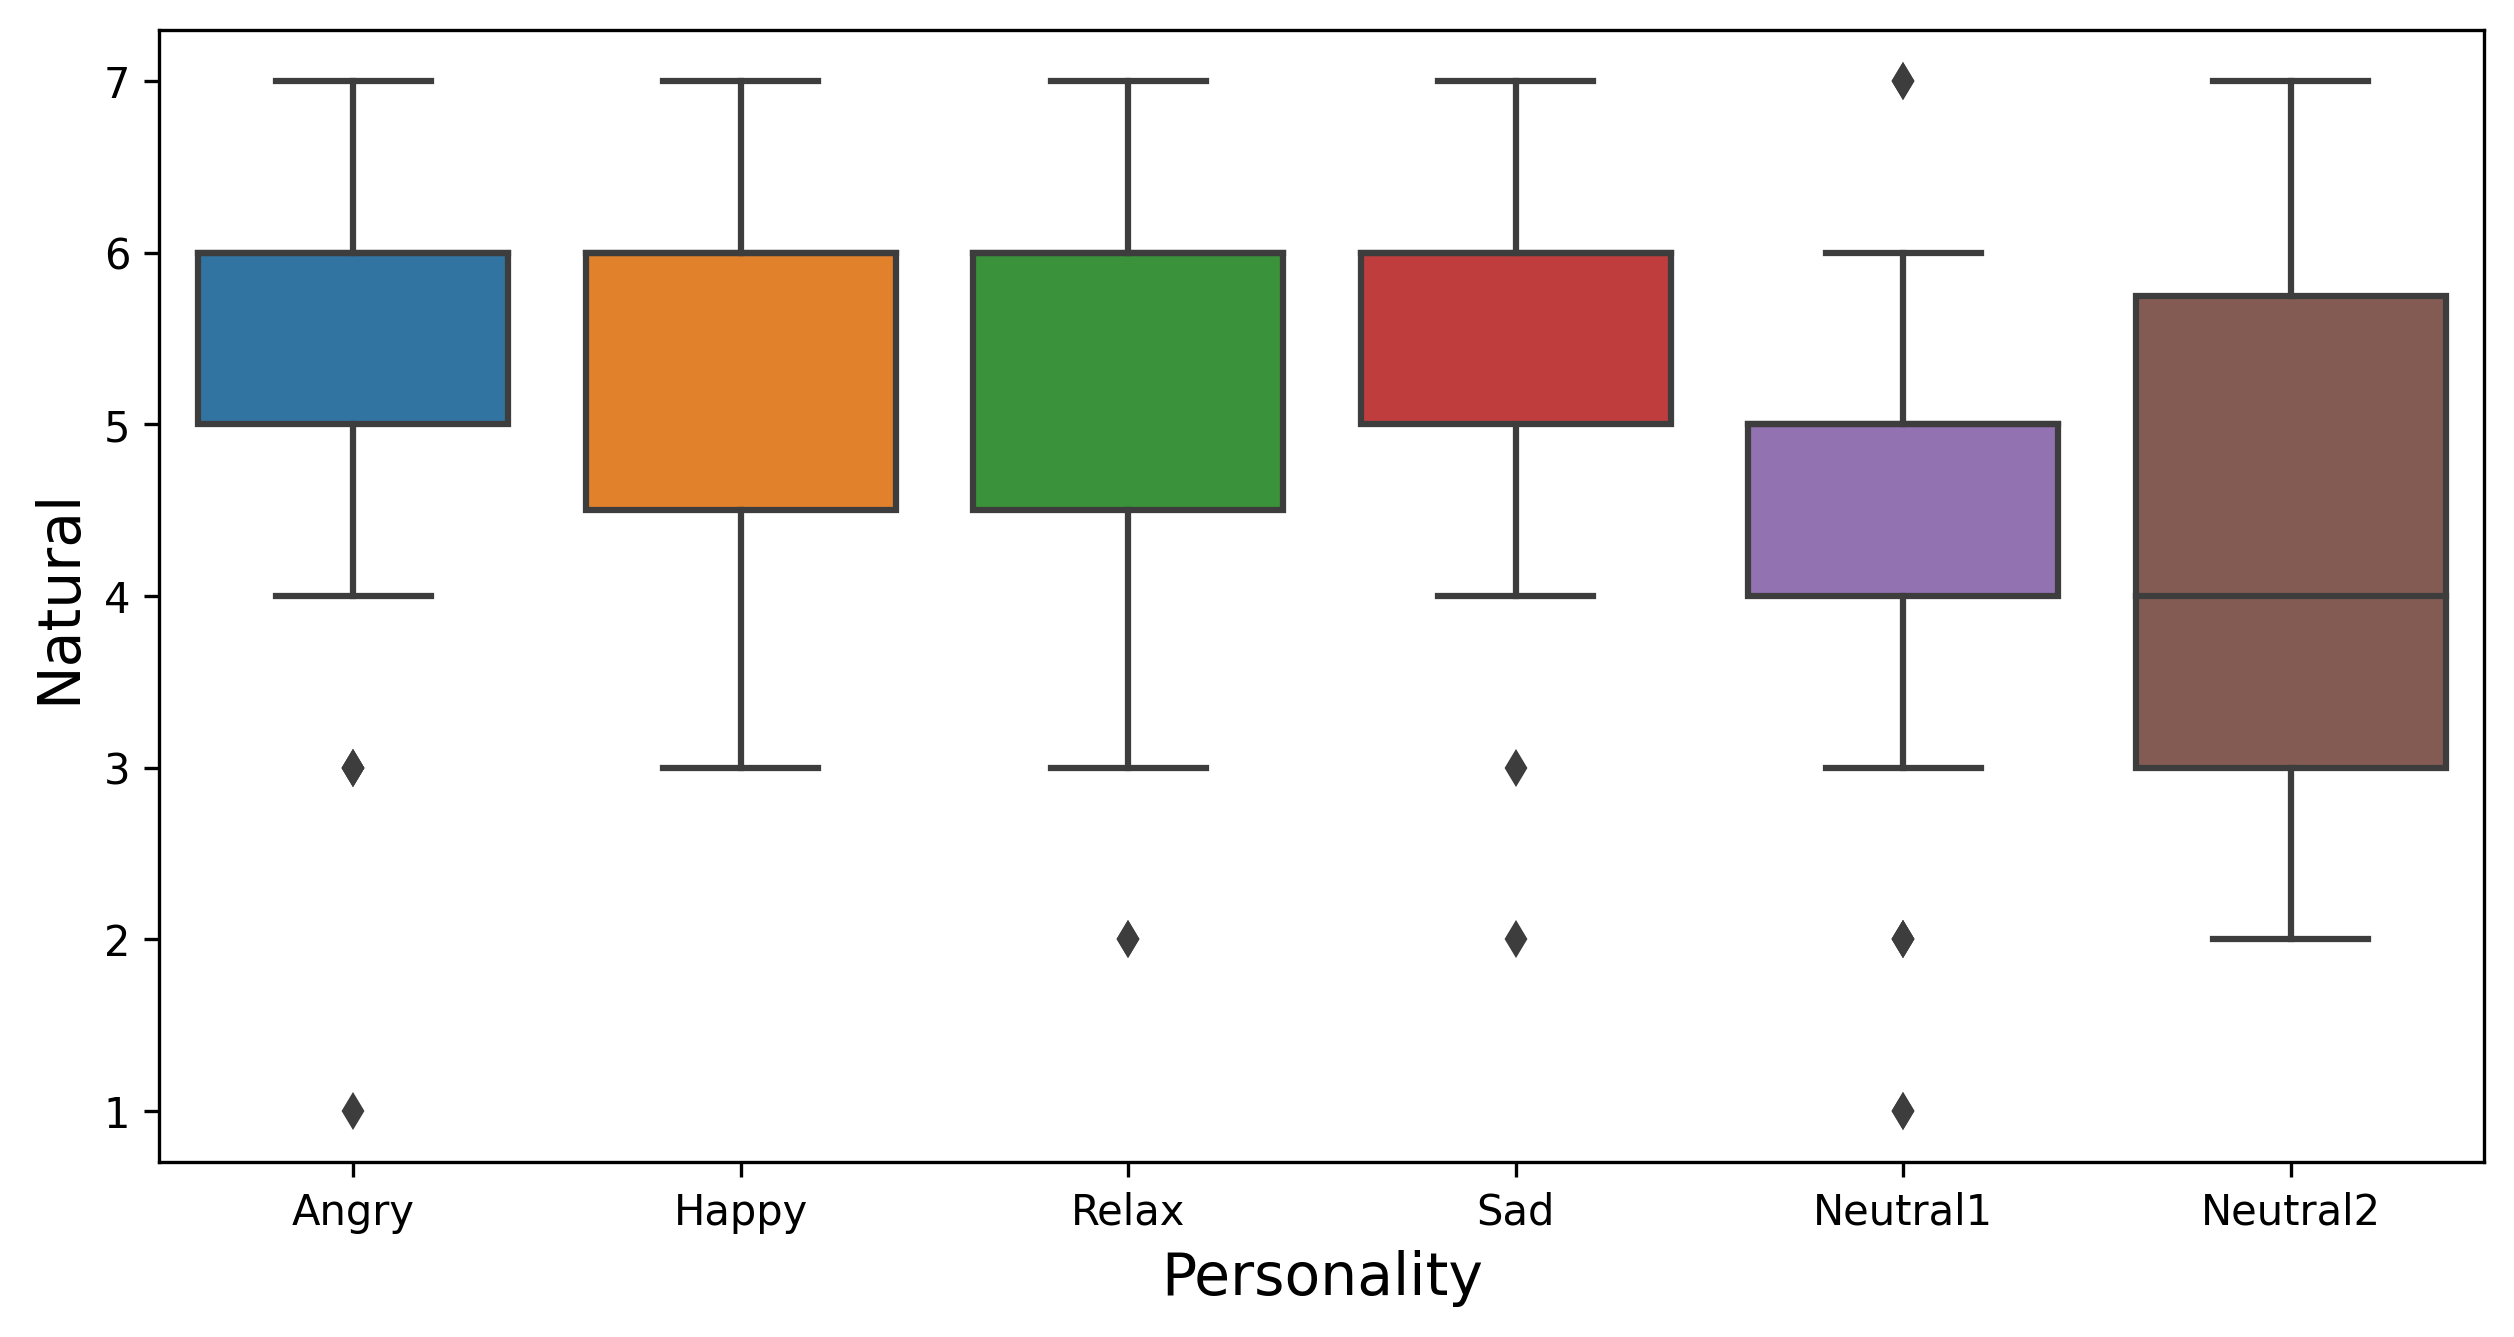

P-value nan with significance ***


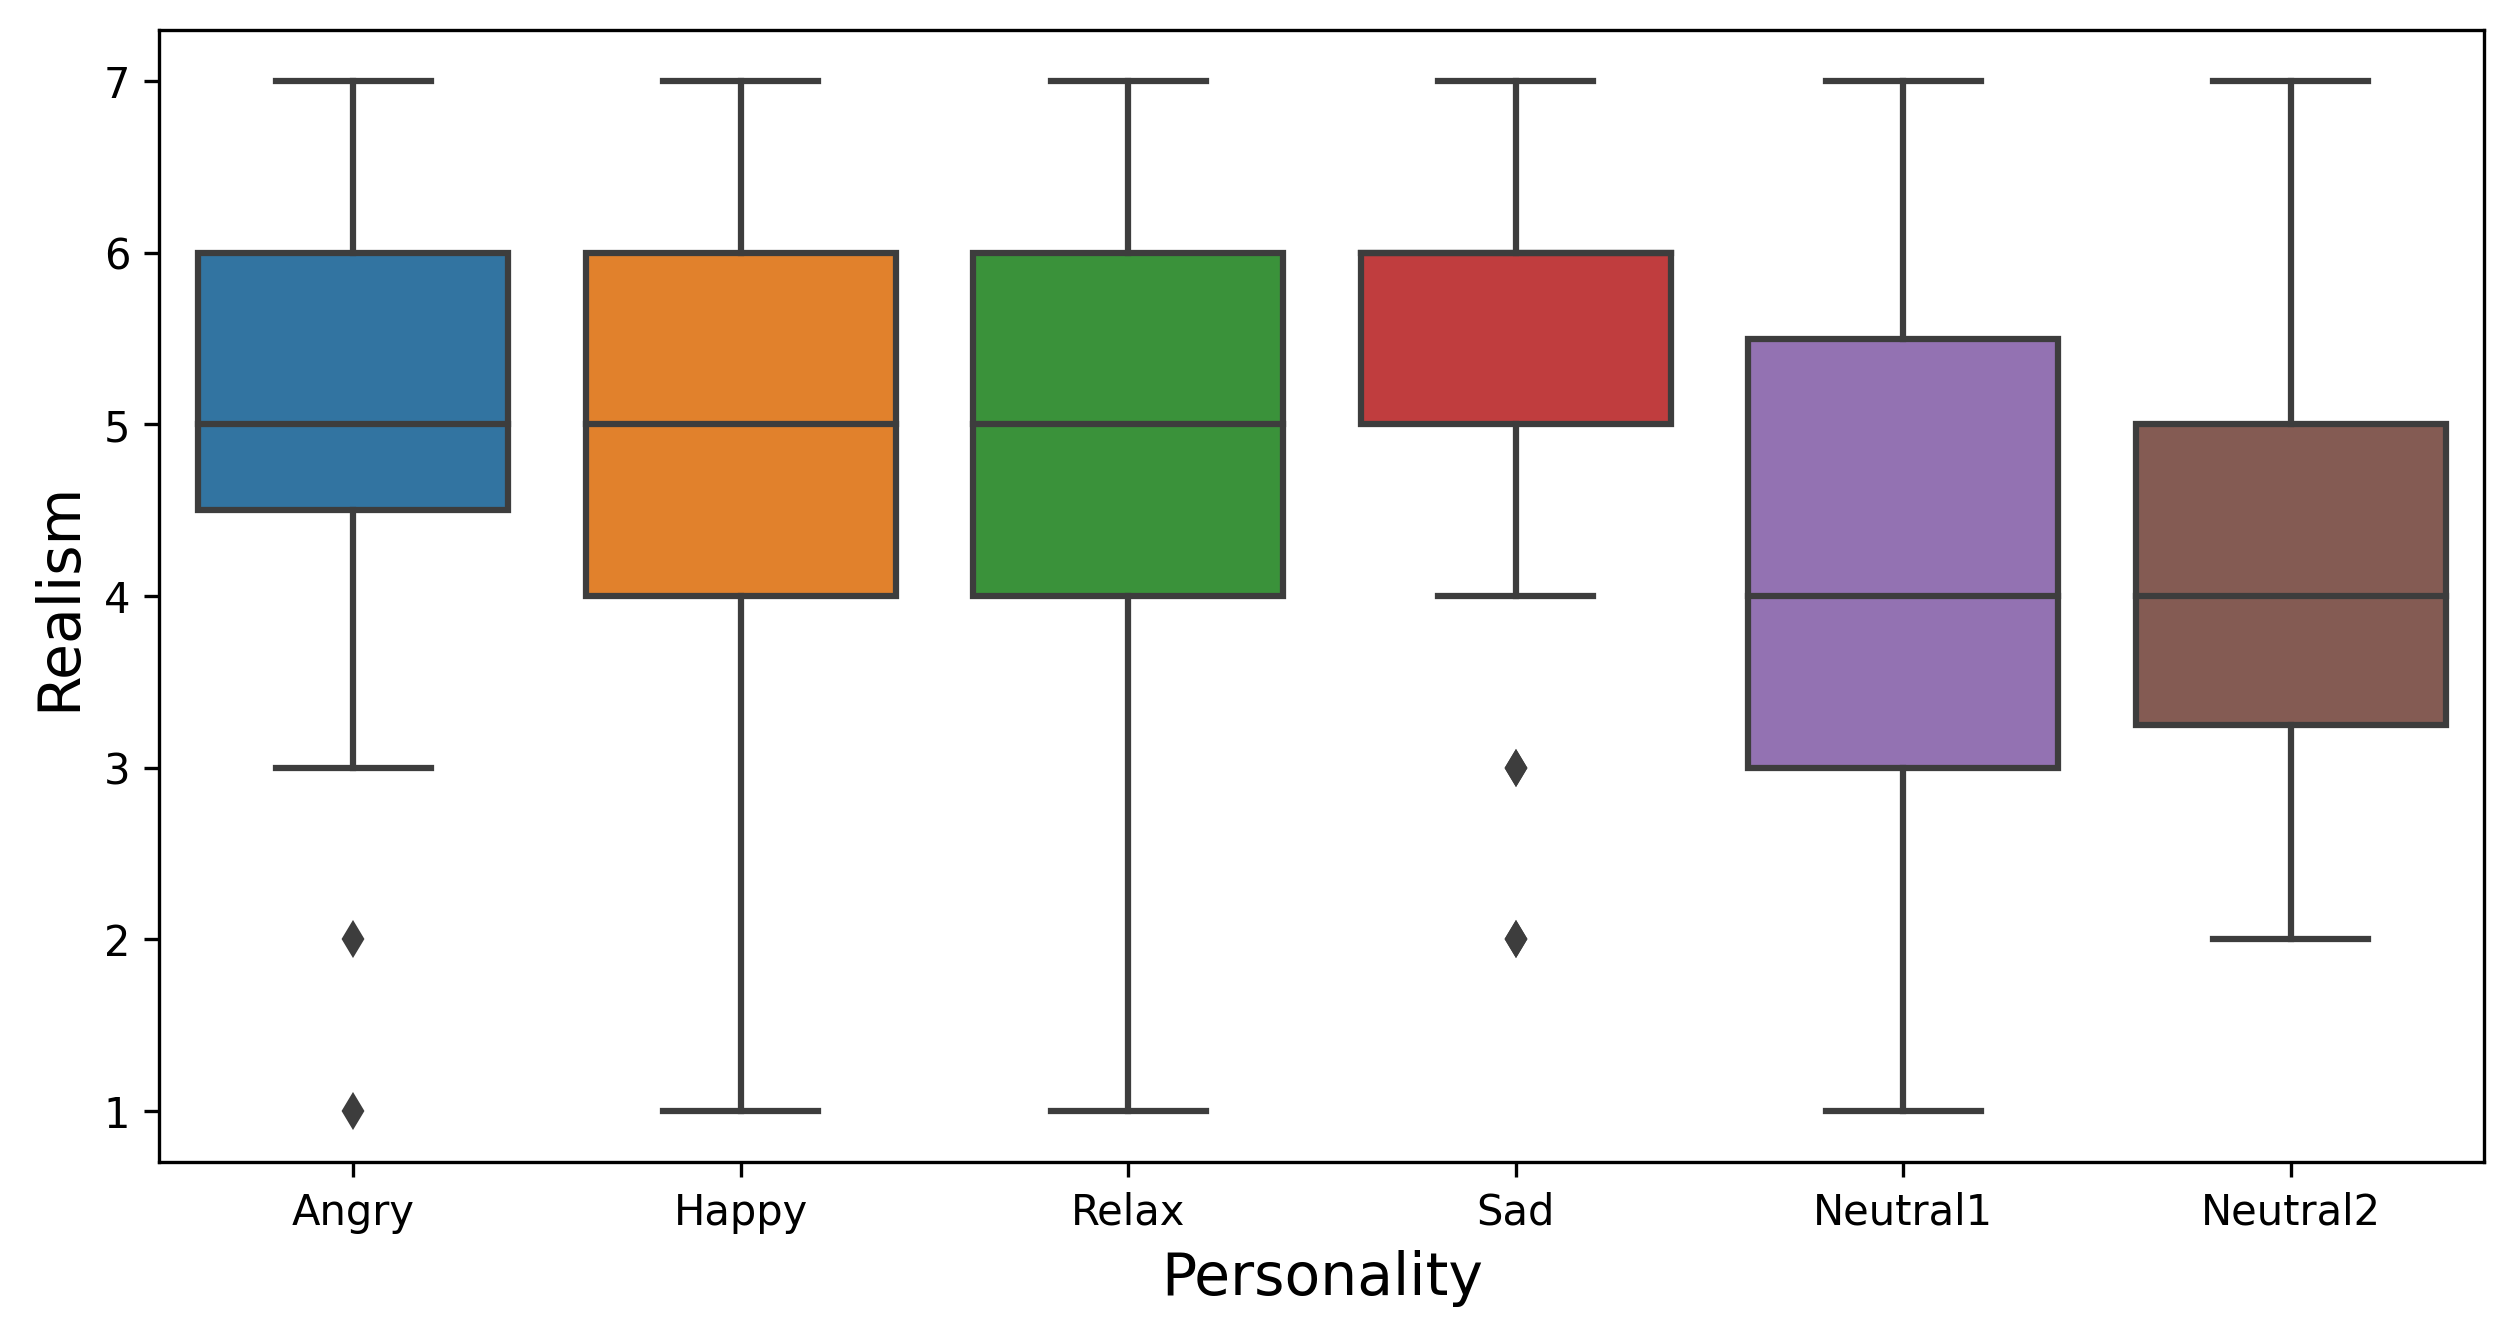

In [33]:
aute.make_binary_plot(data=df_all_cuest, 
                      x_feat="Personality", x_name="Personality", 
                      y_feat="Question1", y_name="Natural")

aute.make_binary_plot(data=df_all_cuest, 
                      x_feat="Personality", x_name="Personality", 
                      y_feat="Question2", y_name="Realism")

# Quizá deberia combinar ambos plots, donde por cada personalidad hay dos boxplots, uno de realismo y otro de naturalidad. 

## SAM Cuest

### Taking the questions directly

Questions 3 and 4

In [34]:
def rescale_feature(array, min_sc=-4, max_sc=4):
    num = max_sc * ( array-np.min(array) ) + min_sc * ( np.max(array) - array)
    den = np.max(array)-np.min(array)
    return num/den

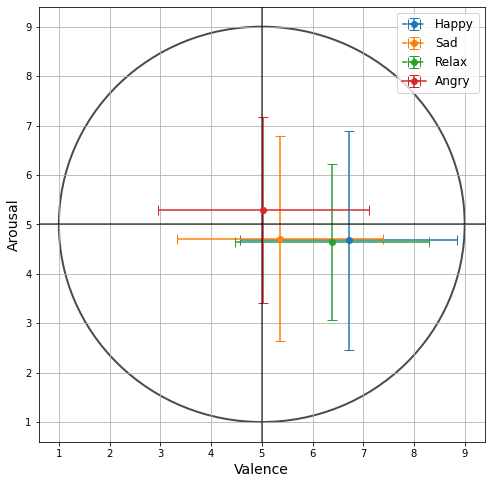

,Personality 1,Personality 2,NumSamples,Valencia p-value,Valencia p-value sig,Arousal p-value,Arousal p-value sig
0,Angry,Happy,31,0.002349,**,0.316161,-
1,Angry,Sad,31,0.597981,-,0.275732,-
2,Angry,Relax,31,0.013018,*,0.107324,-
3,Happy,Sad,31,0.009398,**,0.954182,-
4,Happy,Relax,31,0.403780,-,0.739316,-
5,Sad,Relax,31,0.046126,*,0.727588,-


In [35]:
# #######################
# ### SAM for Subject ###
# #######################

circle2 = plt.Circle((5, 5), 4, color='black', fill=False, linewidth=2, alpha=0.7)

fig, ax = plt.subplots(figsize=(8, 8)) # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

plt.errorbar((df_happy["Question3"]).mean(), 
             (df_happy["Question4"]).mean(), 
             xerr=(df_happy["Question3"]).std(), 
             yerr=(df_happy["Question4"]).std(), 
             marker='o', capsize=5, linestyle="--", label="Happy")

plt.errorbar((df_sad["Question3"]).mean(), 
             (df_sad["Question4"]).mean(), 
             xerr=(df_sad["Question3"]).std(), 
             yerr=(df_sad["Question4"]).std(),
             marker='o', capsize=5, linestyle="--", label="Sad")

plt.errorbar((df_relax["Question3"]).mean(), 
             (df_relax["Question4"]).mean(), 
             xerr=(df_relax["Question3"]).std(), 
             yerr=(df_relax["Question4"]).std(), 
             marker='o', capsize=5, linestyle="--", label="Relax")

plt.errorbar((df_angry["Question3"]).mean(), 
             (df_angry["Question4"]).mean(), 
             xerr=(df_angry["Question3"]).std(), 
             yerr=(df_angry["Question4"]).std(),
             marker='o', capsize=5, label="Angry")

ax.add_patch(circle2)

plt.axvline(5, c="black", alpha=0.7)
plt.axhline(5, c="black", alpha=0.7)
plt.grid()

plt.legend(fontsize=12)
plt.xlabel("Valence", fontsize=14)
plt.ylabel("Arousal", fontsize=14)

plt.savefig("Results/Images/SAMSubject.pdf", dpi=300, format="pdf")
plt.show()

personality_list = ["Angry", "Happy", "Sad", "Relax"]

results_subject_list = []
for i_p1, p1 in enumerate(personality_list[:-1]):
    for p2 in personality_list[(i_p1+1):]:
        # print("Personality", p1, p2)
        
        x1 = (df_all_cuest[df_all_cuest["Personality"] == p1]["Question3"]).dropna()
        x2 = (df_all_cuest[df_all_cuest["Personality"] == p2]["Question3"]).dropna()
        
        _, p_value_valencia = sp.stats.mannwhitneyu(x1, x2)
        
        x1 = (df_all_cuest[df_all_cuest["Personality"] == p1]["Question4"]).dropna()
        x2 = (df_all_cuest[df_all_cuest["Personality"] == p2]["Question4"]).dropna()
        
        _, p_value_arousal = sp.stats.mannwhitneyu(x1, x2)
        
        results_subject_list.append({
            "Personality 1": p1,
            "Personality 2": p2,
            "NumSamples": len(x1),
            "Valencia p-value": p_value_valencia,
            "Valencia p-value sig": aute.get_p_string(p_value_valencia),
            "Arousal p-value": p_value_arousal,
            "Arousal p-value sig": aute.get_p_string(p_value_arousal),
        })
        
pd.DataFrame(results_subject_list)

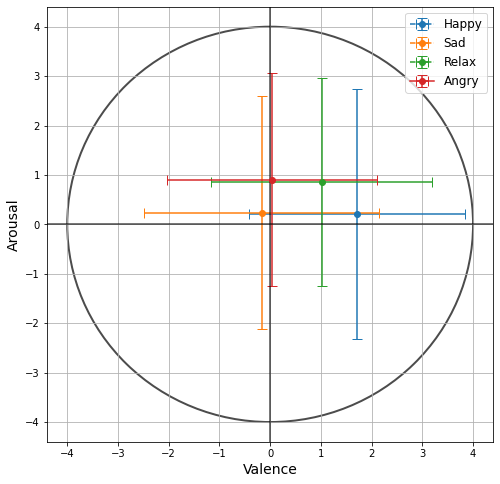

,Personality 1,Personality 2,NumSamples,Valencia p-value,Valencia p-value sig,Arousal p-value,Arousal p-value sig
0,Angry,Happy,31,0.002349,**,0.316161,-
1,Angry,Sad,31,0.661552,-,0.275732,-
2,Angry,Relax,31,0.104351,-,0.765688,-
3,Happy,Sad,31,0.000982,***,0.954182,-
4,Happy,Relax,31,0.113959,-,0.348787,-
5,Sad,Relax,31,0.046126,*,0.313441,-


In [36]:
# #######################
# ### SAM for Subject ###
# #######################

circle2 = plt.Circle((0, 0), 4, color='black', fill=False, linewidth=2, alpha=0.7)

fig, ax = plt.subplots(figsize=(8, 8)) # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

plt.errorbar(rescale_feature(df_happy["Question3"]).mean(), 
             rescale_feature(df_happy["Question4"]).mean(), 
             xerr=rescale_feature(df_happy["Question3"]).std(), 
             yerr=rescale_feature(df_happy["Question4"]).std(), 
             marker='o', capsize=5, linestyle="--", label="Happy")

plt.errorbar(rescale_feature(df_sad["Question3"]).mean(), 
             rescale_feature(df_sad["Question4"]).mean(), 
             xerr=rescale_feature(df_sad["Question3"]).std(), 
             yerr=rescale_feature(df_sad["Question4"]).std(),
             marker='o', capsize=5, linestyle="--", label="Sad")

plt.errorbar(rescale_feature(df_relax["Question3"]).mean(), 
             rescale_feature(df_relax["Question4"]).mean(), 
             xerr=rescale_feature(df_relax["Question3"]).std(), 
             yerr=rescale_feature(df_relax["Question4"]).std(), 
             marker='o', capsize=5, linestyle="--", label="Relax")

plt.errorbar(rescale_feature(df_angry["Question3"]).mean(), 
             rescale_feature(df_angry["Question4"]).mean(), 
             xerr=rescale_feature(df_angry["Question3"]).std(), 
             yerr=rescale_feature(df_angry["Question4"]).std(),
             marker='o', capsize=5, label="Angry")

ax.add_patch(circle2)

plt.axvline(0, c="black", alpha=0.7)
plt.axhline(0, c="black", alpha=0.7)
plt.grid()

plt.legend(fontsize=12)
plt.xlabel("Valence", fontsize=14)
plt.ylabel("Arousal", fontsize=14)

plt.savefig("Results/Images/SAMSubject.pdf", dpi=300, format="pdf")
plt.show()

personality_list = ["Angry", "Happy", "Sad", "Relax"]

results_subject_list = []
for i_p1, p1 in enumerate(personality_list[:-1]):
    for p2 in personality_list[(i_p1+1):]:
        # print("Personality", p1, p2)
        
        x1 = rescale_feature(df_all_cuest[df_all_cuest["Personality"] == p1]["Question3"]).dropna()
        x2 = rescale_feature(df_all_cuest[df_all_cuest["Personality"] == p2]["Question3"]).dropna()
        
        _, p_value_valencia = sp.stats.mannwhitneyu(x1, x2)
        
        x1 = rescale_feature(df_all_cuest[df_all_cuest["Personality"] == p1]["Question4"]).dropna()
        x2 = rescale_feature(df_all_cuest[df_all_cuest["Personality"] == p2]["Question4"]).dropna()
        
        _, p_value_arousal = sp.stats.mannwhitneyu(x1, x2)
        
        results_subject_list.append({
            "Personality 1": p1,
            "Personality 2": p2,
            "NumSamples": len(x1),
            "Valencia p-value": p_value_valencia,
            "Valencia p-value sig": aute.get_p_string(p_value_valencia),
            "Arousal p-value": p_value_arousal,
            "Arousal p-value sig": aute.get_p_string(p_value_arousal),
        })
        
pd.DataFrame(results_subject_list)

Text(0, 0.5, 'Arousal')

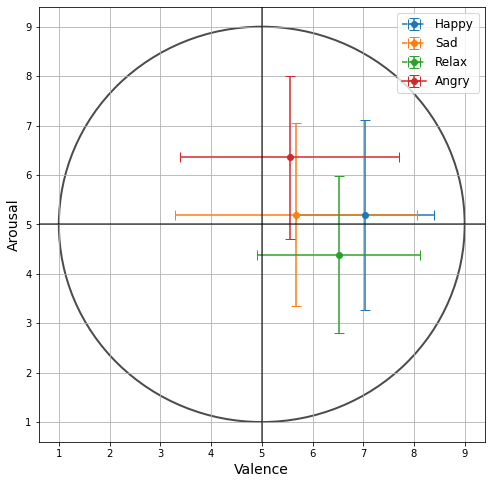

In [37]:
circle2 = plt.Circle((5, 5), 4, color='black', fill=False, linewidth=2, alpha=0.7)

fig, ax = plt.subplots(figsize=(8, 8)) # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

plt.errorbar((df_happy["Question6"]).mean(), 
             (df_happy["Question7"]).mean(), 
             xerr=(df_happy["Question6"]).std(), 
             yerr=(df_happy["Question7"]).std(), 
             marker='o', capsize=5, linestyle="--", label="Happy")

plt.errorbar((df_sad["Question6"]).mean(), 
             (df_sad["Question7"]).mean(), 
             xerr=(df_sad["Question6"]).std(), 
             yerr=(df_sad["Question7"]).std(),
             marker='o', capsize=5, linestyle="--", label="Sad")

plt.errorbar((df_relax["Question6"]).mean(), 
             (df_relax["Question7"]).mean(), 
             xerr=(df_relax["Question6"]).std(), 
             yerr=(df_relax["Question7"]).std(), 
             marker='o', capsize=5, linestyle="--", label="Relax")

plt.errorbar((df_angry["Question6"]).mean(), 
             (df_angry["Question7"]).mean(), 
             xerr=(df_angry["Question6"]).std(), 
             yerr=(df_angry["Question7"]).std(),
             marker='o', capsize=5, label="Angry")

ax.add_patch(circle2)

plt.axvline(5, c="black", alpha=0.7)
plt.axhline(5, c="black", alpha=0.7)
plt.grid()

plt.legend(fontsize=12)
plt.xlabel("Valence", fontsize=14)
plt.ylabel("Arousal", fontsize=14)

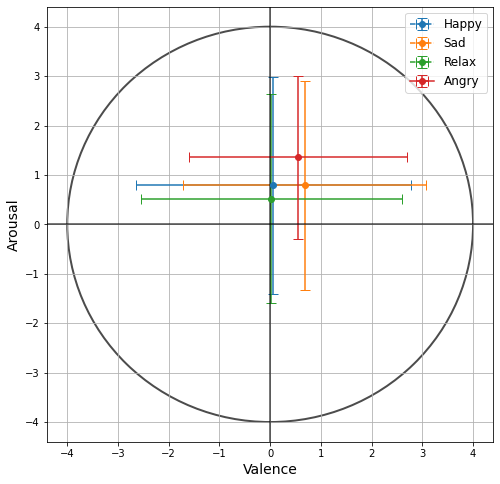

,Personality 1,Personality 2,NumSamples,Valencia p-value,Valencia p-value sig,Arousal p-value,Arousal p-value sig
0,Angry,Happy,31,0.445082,-,0.209446,-
1,Angry,Sad,31,0.759657,-,0.178037,-
2,Angry,Relax,31,0.419842,-,0.086530,-
3,Happy,Sad,31,0.373190,-,0.861461,-
4,Happy,Relax,31,0.765685,-,0.583717,-
5,Sad,Relax,31,0.285269,-,0.722095,-


In [38]:
# ######################
# ### SAM for Avatar ###
# ######################

circle2 = plt.Circle((0, 0), 4, color='black', fill=False, linewidth=2, alpha=0.7)

fig, ax = plt.subplots(figsize=(8, 8)) # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

plt.errorbar(rescale_feature(df_happy["Question6"]).mean(), 
             rescale_feature(df_happy["Question7"]).mean(), 
             xerr=rescale_feature(df_happy["Question6"]).std(), 
             yerr=rescale_feature(df_happy["Question7"]).std(), 
             marker='o', capsize=5, linestyle="--", label="Happy")

plt.errorbar(rescale_feature(df_sad["Question6"]).mean(), 
             rescale_feature(df_sad["Question7"]).mean(), 
             xerr=rescale_feature(df_sad["Question6"]).std(), 
             yerr=rescale_feature(df_sad["Question7"]).std(),
             marker='o', capsize=5, linestyle="--", label="Sad")

plt.errorbar(rescale_feature(df_relax["Question6"]).mean(), 
             rescale_feature(df_relax["Question7"]).mean(), 
             xerr=rescale_feature(df_relax["Question6"]).std(), 
             yerr=rescale_feature(df_relax["Question7"]).std(), 
             marker='o', capsize=5, linestyle="--", label="Relax")

plt.errorbar(rescale_feature(df_angry["Question6"]).mean(), 
             rescale_feature(df_angry["Question7"]).mean(), 
             xerr=rescale_feature(df_angry["Question6"]).std(), 
             yerr=rescale_feature(df_angry["Question7"]).std(),
             marker='o', capsize=5, label="Angry")

ax.add_patch(circle2)

plt.axvline(0, c="black", alpha=0.7)
plt.axhline(0, c="black", alpha=0.7)
plt.grid()

plt.legend(fontsize=12)
plt.xlabel("Valence", fontsize=14)
plt.ylabel("Arousal", fontsize=14)

plt.savefig("Results/Images/SAMVH.pdf", dpi=300, format="pdf")
plt.show()

personality_list = ["Angry", "Happy", "Sad", "Relax"]

results_vh_list = []
for i_p1, p1 in enumerate(personality_list[:-1]):
    for p2 in personality_list[(i_p1+1):]:
        # print("Personality", p1, p2)
        
        x1 = rescale_feature(df_all_cuest[df_all_cuest["Personality"] == p1]["Question6"]).dropna()
        x2 = rescale_feature(df_all_cuest[df_all_cuest["Personality"] == p2]["Question6"]).dropna()
        
        _, p_value_valencia = sp.stats.mannwhitneyu(x1, x2)
        
        x1 = rescale_feature(df_all_cuest[df_all_cuest["Personality"] == p1]["Question7"]).dropna()
        x2 = rescale_feature(df_all_cuest[df_all_cuest["Personality"] == p2]["Question7"]).dropna()
        
        _, p_value_arousal = sp.stats.mannwhitneyu(x1, x2)
        
        results_vh_list.append({
            "Personality 1": p1,
            "Personality 2": p2,
            "NumSamples": len(x1),
            "Valencia p-value": p_value_valencia,
            "Valencia p-value sig": aute.get_p_string(p_value_valencia),
            "Arousal p-value": p_value_arousal,
            "Arousal p-value sig": aute.get_p_string(p_value_arousal),
        })
        
pd.DataFrame(results_vh_list)

### Final questions VAS Cuest

In [39]:
features_to_change_subject = [
    'Disgusto', 'Felicidad', 'Enfado', 'Miedo', 'Relajado',
    'Sorpresa', 'Tristeza'
]

features_to_change_avatar = [
    'Disgusto.1', 'Felicidad.1', 'Enfado.1',
    'Miedo.1', 'Relajado.1', 'Sorpresa.1', 'Tristeza.1'
]

def achieve_vas_boxplot(data):
    state_vas_plot_list = []
    for i in range(data.shape[0]):
        if "User" in data["Usuario"].iloc[i]:
            for feat in features_to_change_subject:
                state_vas_plot_list.append({
                    "User": data["Usuario"].iloc[i],
                    "State": feat,
                    "Value": data[feat].iloc[i],
                    "Agent": "Human"
                })

            for feat in features_to_change_avatar:
                new_feat = feat.split(".")[0]
                state_vas_plot_list.append({
                    "User": data["Usuario"].iloc[i],
                    "State": new_feat,
                    "Value": data[feat].iloc[i],
                    "Agent": "VH"
                })

    return pd.DataFrame(state_vas_plot_list)

Angry


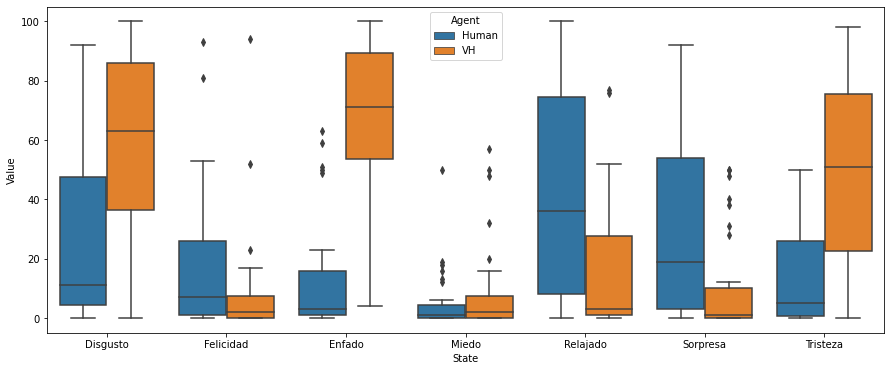

Happy


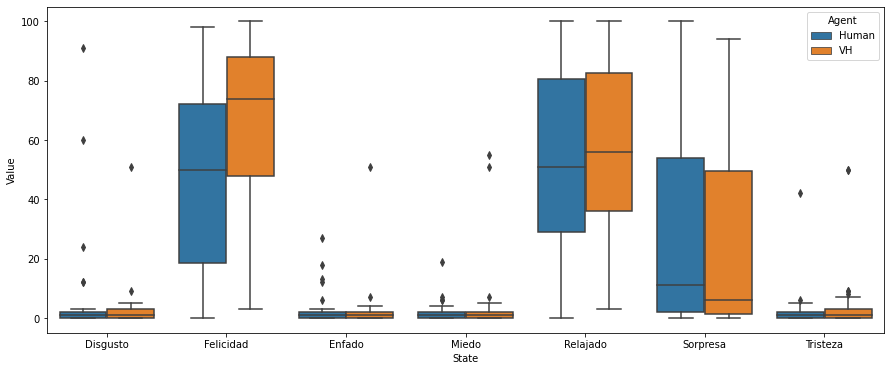

Sad


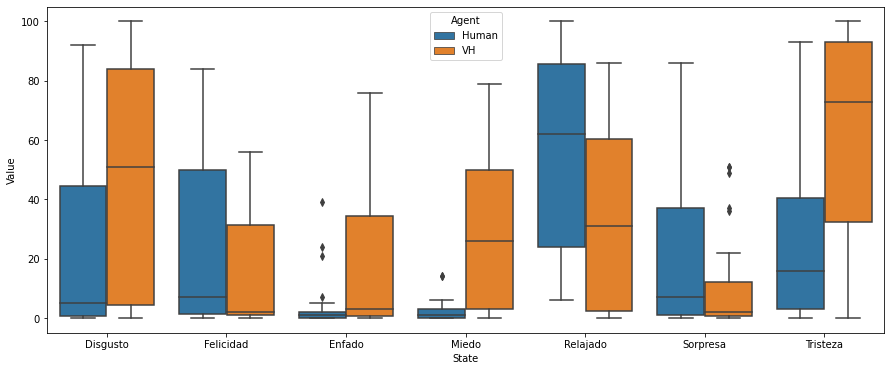

Relax


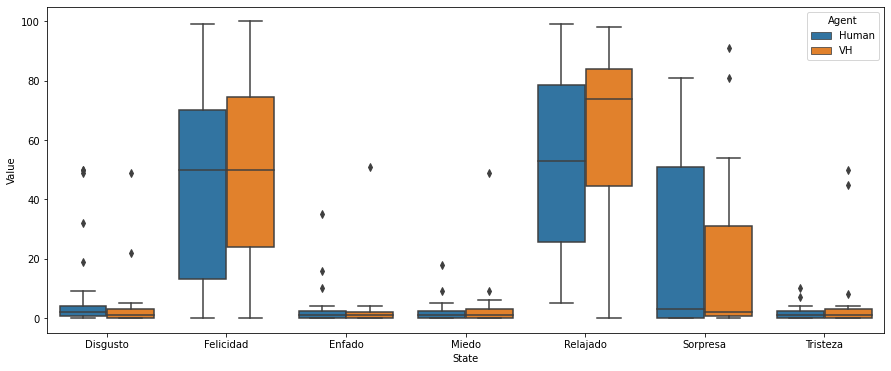

In [40]:
# Angry
print("Angry")
df_angry_vas_plot= achieve_vas_boxplot(df_angry)

plt.figure(figsize=(15, 6))

sns.boxplot(x="State", y="Value", hue="Agent", data=df_angry_vas_plot)
plt.savefig("Results/Images/AngryVASBosplot.pdf", dpi=300, format="pdf")
plt.show()

# Happy
print("Happy")
df_happy_vas_plot= achieve_vas_boxplot(df_happy)

plt.figure(figsize=(15, 6))

sns.boxplot(x="State", y="Value", hue="Agent", data=df_happy_vas_plot)
plt.savefig("Results/Images/HappyVASBosplot.pdf", dpi=300, format="pdf")
plt.show()

# Sad
print("Sad")
df_sad_vas_plot= achieve_vas_boxplot(df_sad)

plt.figure(figsize=(15, 6))

sns.boxplot(x="State", y="Value", hue="Agent", data=df_sad_vas_plot)
plt.savefig("Results/Images/SadVASBosplot.pdf", dpi=300, format="pdf")
plt.show()

# Relax
print("Relax")
df_relax_vas_plot= achieve_vas_boxplot(df_relax)

plt.figure(figsize=(15, 6))

sns.boxplot(x="State", y="Value", hue="Agent", data=df_relax_vas_plot)
plt.savefig("Results/Images/RelaxVASBosplot.pdf", dpi=300, format="pdf")
plt.show()